IMPORT LIBRARY

In [186]:
# Import Library
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

EXPLORATORY DATA ANALYS (EDA)

In [187]:
# Cek Directory
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 0E9C-5EA8

 Directory of D:\WHY DOKUMEN\KODING\PYTHON\Python Basic

25/09/2024  15:00    <DIR>          .
23/09/2024  21:59    <DIR>          ..
23/09/2024  22:31    <DIR>          .ipynb_checkpoints
23/09/2024  22:31            28.629 test.csv
25/09/2024  15:00           447.213 Titanic.ipynb
23/09/2024  22:31            61.194 train.csv
               3 File(s)        537.036 bytes
               3 Dir(s)  158.199.480.320 bytes free


In [188]:
# Load or Read Dataset dengan read_csv dari Pandas Library
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [189]:
# Print dataset dari 5 teratas
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [190]:
# Print dataset dari 5 terbawah
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [191]:
# Cek Dimensi Dataset (records, features)
train.shape

(891, 12)

In [192]:
# Cek Type Data dari semua features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [193]:
# Cek deskripsi atau statistik dari dataset
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [194]:
# Cek Missing Value setiap features dataset
train.isnull().sum() #.sum() jumlah records

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualisasi Data dengan Simple Barchart

In [195]:
# Cek feature "Sex" nilainya apa dan berapa
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [196]:
# Inisiasi dalam variabel "count_sex"
count_sex = train["Sex"].value_counts()

index_sex = count_sex.index #Inisiasi index
values_sex = count_sex.values #Inisiasi value

In [197]:
# Print index
index_sex

Index(['male', 'female'], dtype='object', name='Sex')

In [198]:
# Print values
values_sex

array([577, 314])

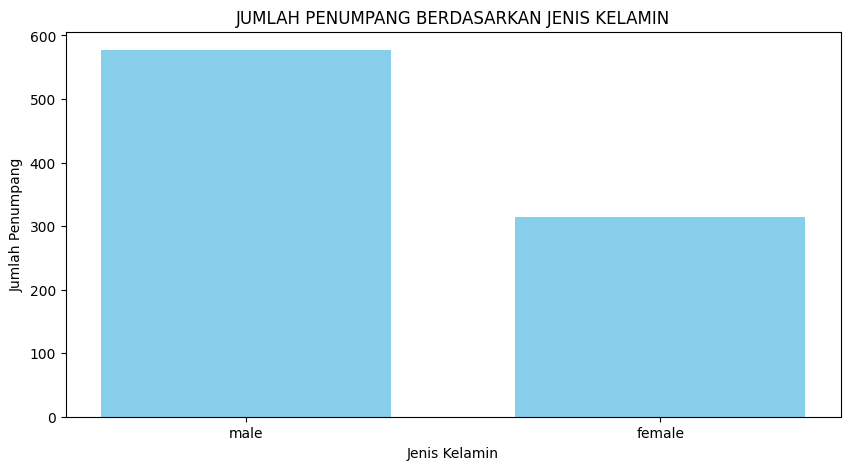

In [199]:
# Inisiasi untuk mengatur ukuran figure atau chart dari Library matplotlib
fig = plt.figure(figsize = (10, 5))
# Set parameter dari Barchart yang akan divisualisasikan
plt.bar(index_sex, values_sex, color = "skyblue", width = 0.7)

# Set nama Label-X
plt.xlabel("Jenis Kelamin")
# Set nama Label-Y
plt.ylabel("Jumlah Penumpang")
# Set Title chart
plt.title("JUMLAH PENUMPANG BERDASARKAN JENIS KELAMIN")

# Print
plt.show()

In [200]:
# Membuat Function untuk menampilkan barchart dengan parameter features
def BarChart(features):
    count = train[features].value_counts()

    index = count.index
    values = count.values

    fig = plt.figure(figsize = (10, 5))
    plt.bar(index, values, color = "yellow", width = 0.7)

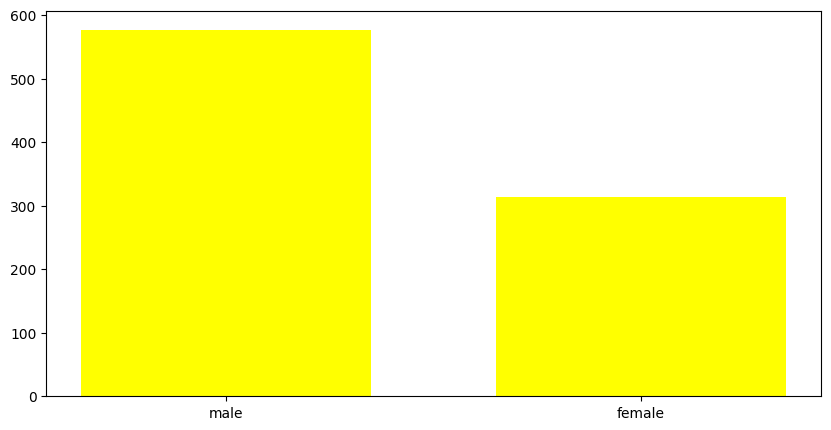

In [201]:
# Call function BarChart untuk menampilkan features Sex
BarChart("Sex")

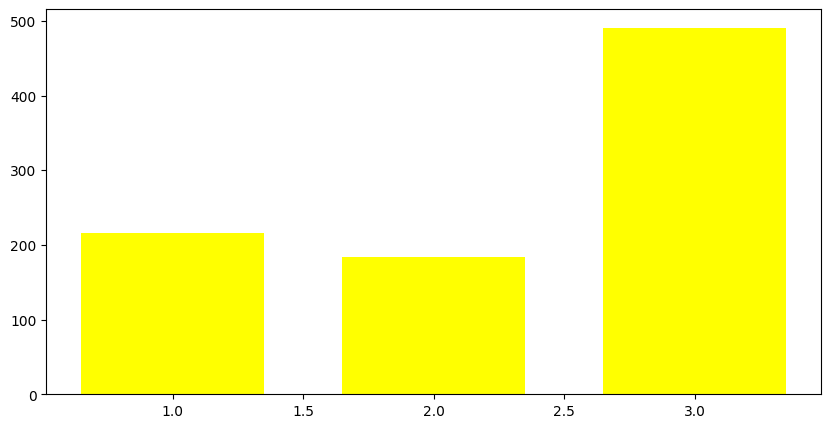

In [202]:
# Memvisualisasikan feature Pclass
BarChart("Pclass")

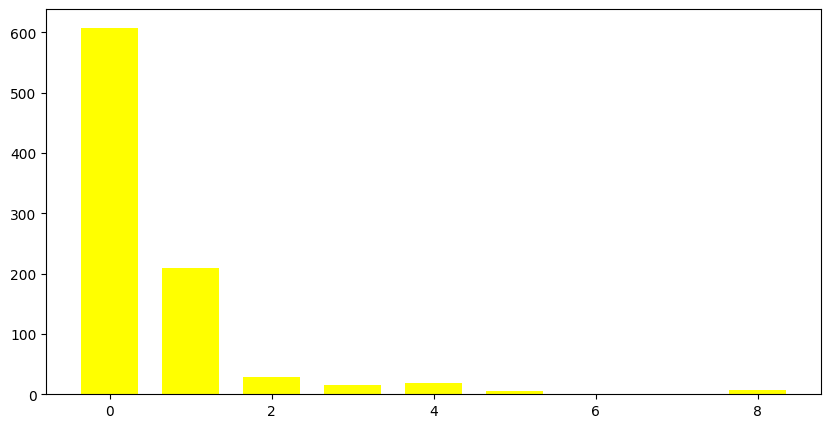

In [203]:
# Memvisualisasi feature SibSp
BarChart("SibSp")

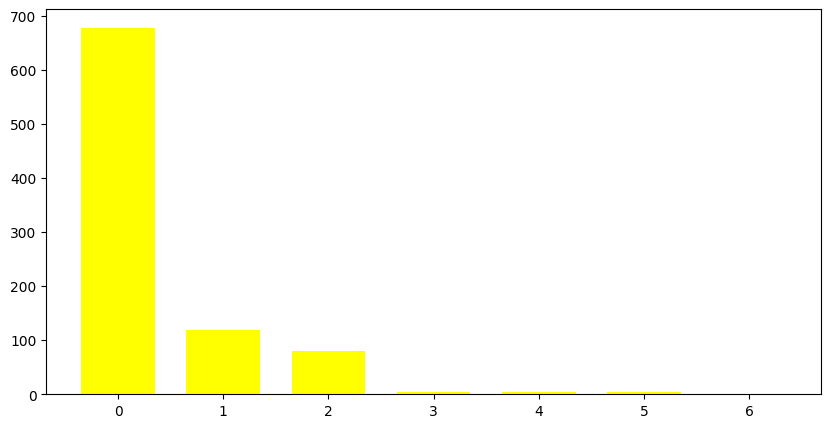

In [204]:
# Memvisualisasi feature Parch
BarChart("Parch")

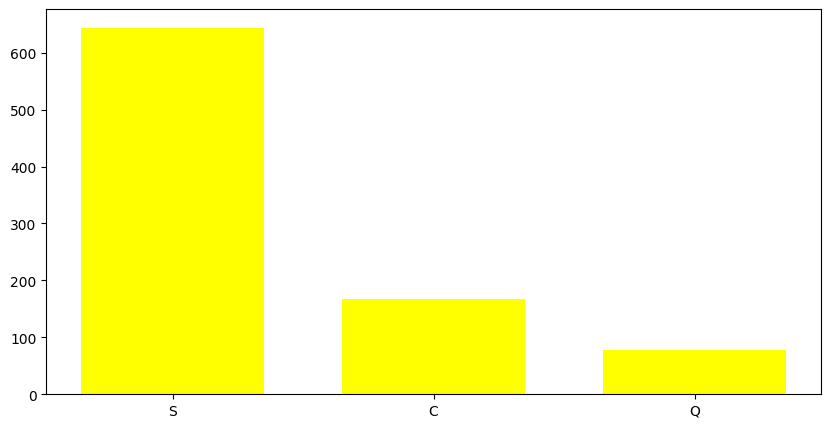

In [205]:
# Memvisualisasi feature Embarked
BarChart("Embarked")

Visualisasi Data dengan Group Barchart

In [206]:
# Print kembali dataset
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [207]:
# Inisiasi grouped survived berdasarkan sex
survived = train.groupby(["Survived", "Sex"]).count()["PassengerId"].reset_index() #Mengembalikan Data Frame menjadi tabel

In [208]:
# Print
survived

Survived     Sex  PassengerId
0         0  female           81
1         0    male          468
2         1  female          233
3         1    male          109

In [209]:
# Function untuk mengelompokkan atau Grouped Survived berdasarkan parameter feature
def GroupChart(column):
    survived = train.groupby(["Survived", column]).count()["PassengerId"].reset_index()

    # Group BarChart dengan catplot dari Library Seaborn
    g = sns.catplot(
        data = survived, kind = "bar",
        x = "Survived", y = "PassengerId", hue = column, #pemisah batang dari barchart
        palette = "muted", height = 6
    )

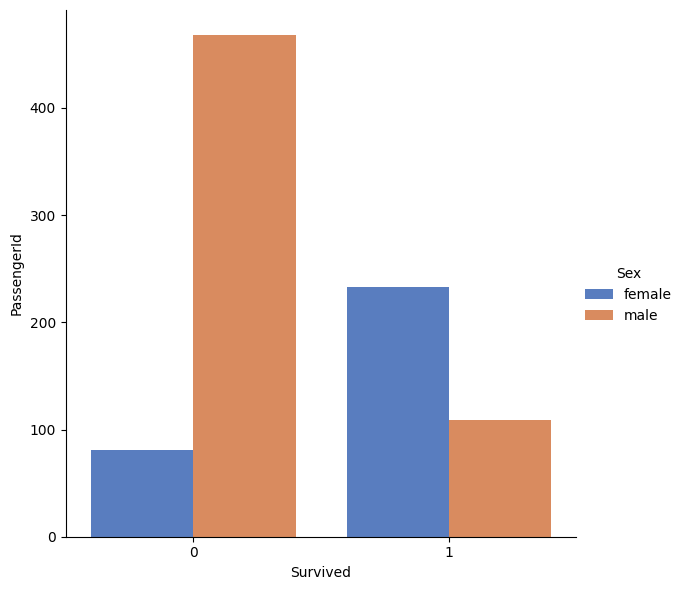

In [210]:
# Print Survived berdasarkan feature Sex
GroupChart("Sex")

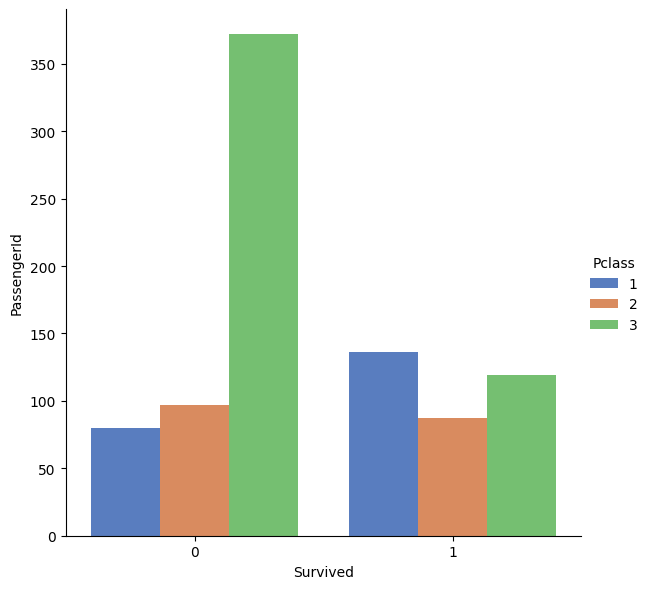

In [211]:
# Print Survived berdasarkan feature Pclass
GroupChart("Pclass")

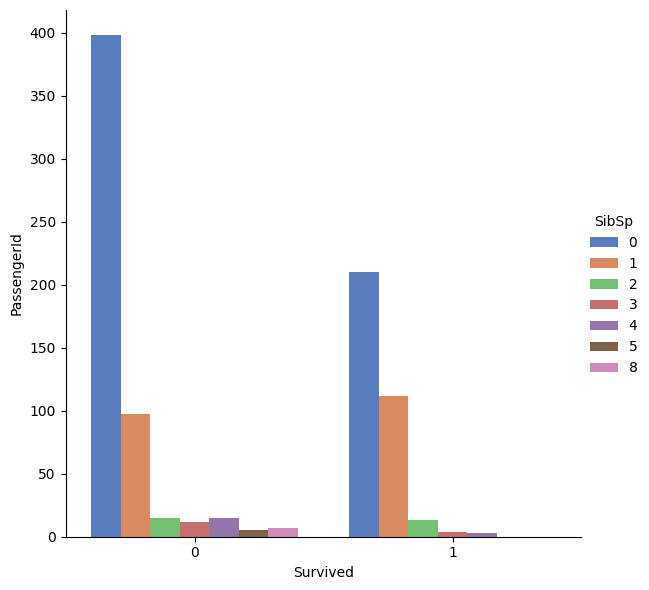

In [212]:
# Print Survived berdasarkan SibSp
GroupChart("SibSp")

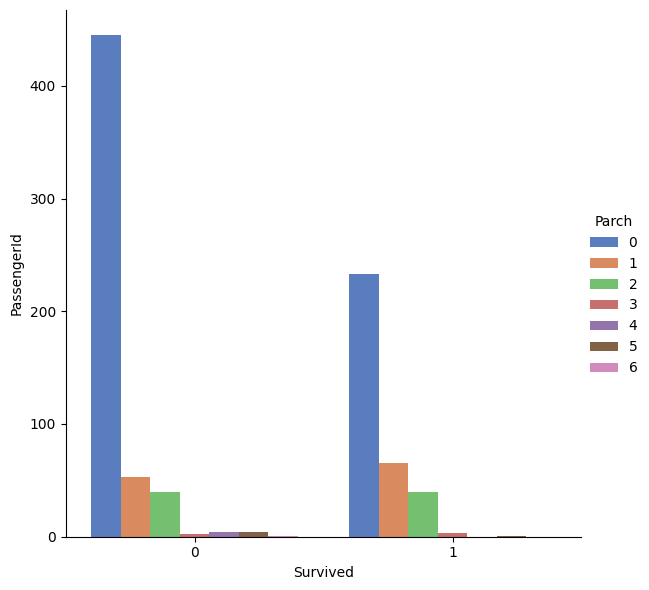

In [213]:
GroupChart("Parch")

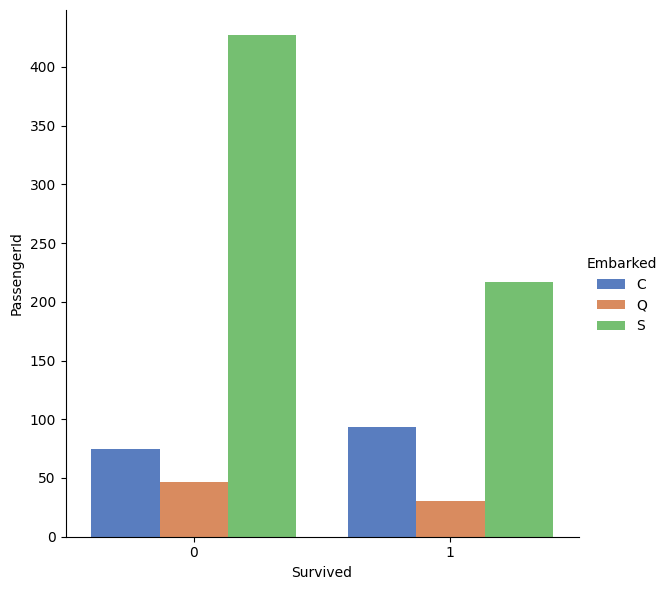

In [214]:
GroupChart("Embarked")

Visualisasi Data dengan Histogram

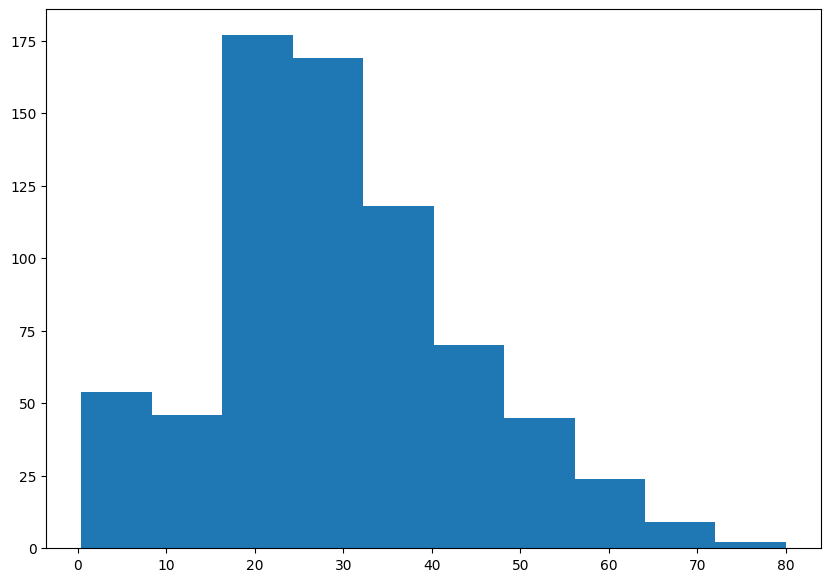

In [215]:
# Set figure dan inisiasi axes atau area dalam figure histogram
fig, ax = plt.subplots(figsize = (10,7))
# Function untuk set feature Age ke dalam area histogram
ax.hist(train.Age)

# Print histogram
plt.show()

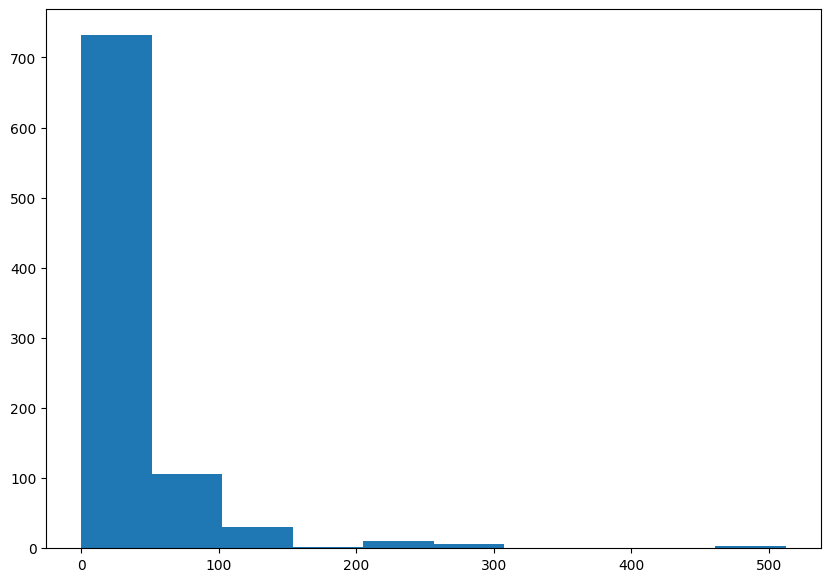

In [216]:
# Set figure dan inisiasi axes atau area dalam figure histogram
fig, ax = plt.subplots(figsize = (10,7))
# Function untuk set feature Fare ke dalam area histogram
ax.hist(train.Fare)

# Print histogram
plt.show()

Visualisasi Data dengan KDE Plot

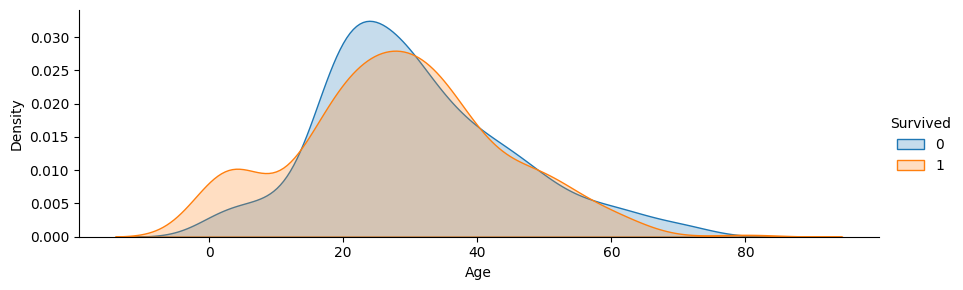

In [217]:
# Inisiasi set facet Grid dari Seaborn
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3) #aspect maksudnya skala perbandingan dari plot
# Function memetakan KDE plot dengan facet Grid
facet.map(sns.kdeplot, "Age", fill = True) #fill maksudnya warna dari area plot kurva
# Menambahkan legend atau keterangan pada plot
facet.add_legend()

# Print KDE Plot
plt.show()

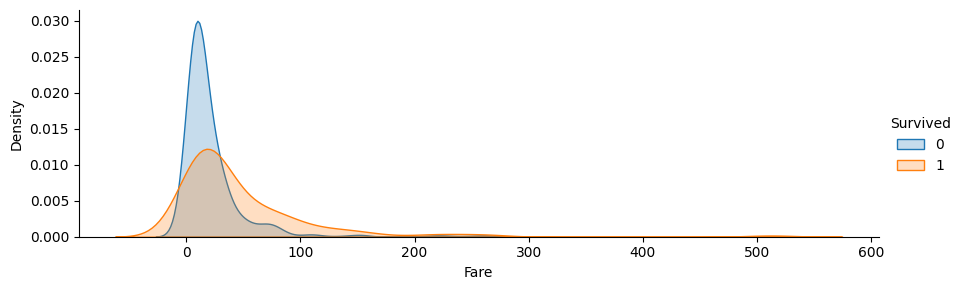

In [218]:
# Inisiasi set facet Grid dari Seaborn
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3) #aspect maksudnya skala perbandingan dari plot
# Function memetakan KDE plot dengan facet Grid
facet.map(sns.kdeplot, "Fare", fill = True) #fill maksudnya warna dari area plot kurva
# Menambahkan legend atau keterangan pada plot
facet.add_legend()

# Print KDE Plot
plt.show()

Preprocessing Data

Missing Value

In [219]:
# Print dataset train
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [220]:
# Print dataset test
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [221]:
# Print missing value dari setiap feature dataset train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
# Print missing value dari setiap features dataset test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [223]:
# Print missing value feature "Embarked" dataset train
train[train["Embarked"].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [224]:
# Print banyak value dari feature Embarked
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [225]:
# Inisiasi nilai modus dari feature "Embarked"
modus_embarked = train["Embarked"].mode()[0] #.mode() artinya modus & [0] artinya index 0 modus pertama
# Print modus Embarked
modus_embarked

'S'

In [226]:
# Inisiasi memasukkan modus_embarked ke missing value dari feature "Embarked"
train["Embarked"] = train["Embarked"].fillna(modus_embarked)

In [227]:
# Print missing value dari feature Embarked
train[train["Embarked"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [228]:
# Print feature "Embarked" pada record index-829
train[train["Embarked"].index == 829]

PassengerId  Survived  Pclass                                       Name  \
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
829  female  62.0      0      0  113572  80.0   B28        S

In [229]:
# Inisiasi nilai mean dari feature "Age" dataset train
mean_age1 = train["Age"].mean() #.mean() artinya mendapatkan nilai mean
# Print nilai mean
mean_age1

np.float64(29.69911764705882)

In [230]:
# Inisiasi memasukkan mean_age1 ke missing value dari feature "Age"
train["Age"] = train["Age"].fillna(mean_age1)

In [231]:
# Print missing value dari feature Age
train[train["Age"].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [232]:
# Inisiasi nilai mean dari feature "Age" dataset test
mean_age2 = test["Age"].mean() #.mean() artinya mendapatkan nilai mean
# Print nilai mean
mean_age2

np.float64(30.272590361445783)

In [233]:
# Inisiasi memasukkan mean_age1 ke missing value dari feature "Age"
test["Age"] = test["Age"].fillna(mean_age2)

In [234]:
# Print missing value dari feature Embarked
test[test["Age"].isnull()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [235]:
# Inisiasi nilai mean dari feature "Fare" dataset test
mean_fare = test["Fare"].mean() #.mean() artinya mendapatkan nilai mean
# Print nilai mean
mean_fare

np.float64(35.627188489208635)

In [236]:
# Inisiasi memasukkan mean_fare ke missing value dari feature "Fare"
test["Fare"] = test["Fare"].fillna(mean_fare)

In [237]:
# Print missing value dari feature Fare
test[test["Fare"].isnull()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [238]:
# Inisiasi drop sekolom feature "Cabin" dalam dataset train
train = train.drop(["Cabin"], axis = 1) #axis = 1 artinya sekolom & axis = 0 artinya baris
# Inisiasi drop sekolom feature "Cabin" dalam dataset test
test = test.drop(["Cabin"], axis = 1) #axis = 1 artinya sekolom & axis = 0 artinya baris

In [239]:
# Print missing value dari setiap features dataset train
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [240]:
# Print missing value dari setiap features dataset test
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Convert to Numeric

In [241]:
# Print dataset train
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [242]:
# Print dataset test
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

In [243]:
# Inisiasi sex mapping jika menemukan "male" : diganti 1 & "female" : diganti 0
sex_mapping = {"male" : 1, "female" : 0}

In [244]:
# Inisiasi memasukkan sex_mapping ke feature "Sex" dataset train
train["Sex"] = train["Sex"].map(sex_mapping)
# Inisiasi memasukkan sex_mapping ke feature "Sex" dataset test
test["Sex"] = test["Sex"].map(sex_mapping)

In [245]:
# Print dataset train setelah di-convert
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S

In [246]:
# Print dataset test setelah di-convert
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

In [247]:
# Inisiasi memasukkan feature "Embarked" dataset train ke dalam variable embarked
embarked = train["Embarked"]
# Inisiasi memanggil function .get_dummies untuk one-hot endocding embarked dari  library pandas
dummies = pd.get_dummies(embarked)

# Print dummies yang sudah dilakukan one-hot encoding
dummies.head()

C      Q      S
0  False  False   True
1   True  False  False
2  False  False   True
3  False  False   True
4  False  False   True

In [248]:
# Inisiasi memanggil function merge untuk menggabungkan dummies ke dataset train dari library pandas
train = pd.merge(train.reset_index(), dummies.reset_index()) #reset_index() untuk mengatur ulang data frame

# Print dataset train yang sudah dilakukan merge
train.head()

index  PassengerId  Survived  Pclass  \
0      0            1         0       3   
1      1            2         1       1   
2      2            3         1       3   
3      3            4         1       1   
4      4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked      C      Q      S  
0         A/5 21171   7.2500        S  False  False   True  
1          PC 17599  71.2833        C   True  False  False  
2  STON/O2. 3101282   7.9250        S  False  False   True  
3            113803  53.1000        S  False  False   True  
4            373450   8.0500        S  False  False   True

In [249]:
# Inisiasi untuk drop sekolom feature "index" dan  "Embarked" dari dataset train hasil merge
train = train.drop(["index", "Embarked"], axis = 1)
# print(train.columns)

In [250]:
# Print dataset train yang sudah dilakukan drop
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare      C      Q      S  
0         A/5 21171   7.2500  False  False   True  
1          PC 17599  71.2833   True  False  False  
2  STON/O2. 3101282   7.9250  False  False   True  
3            113803  53.1000  False  False   True  
4            373450   8.0500  False  False   True

In [251]:
# Inisiasi memasukkan feature "Embarked" dataset test ke dalam variable embarked2
embarked2 = test["Embarked"]
# Inisiasi memanggil function .get_dummies untuk one-hot endocding embarked dari  library pandas
dummies2 = pd.get_dummies(embarked2)

# Print dummies2 yang sudah dilakukan one-hot encoding
dummies2.head()

C      Q      S
0  False   True  False
1  False  False   True
2  False   True  False
3  False  False   True
4  False  False   True

In [252]:
# Inisiasi memanggil function merge untuk menggabungkan dummies ke dataset test dari library pandas
test = pd.merge(test.reset_index(), dummies2.reset_index()) #reset_index() untuk mengatur ulang data frame

# Print dataset test yang sudah dilakukan merge
test.head()

index  PassengerId  Pclass                                          Name  \
0      0          892       3                              Kelly, Mr. James   
1      1          893       3              Wilkes, Mrs. James (Ellen Needs)   
2      2          894       2                     Myles, Mr. Thomas Francis   
3      3          895       3                              Wirz, Mr. Albert   
4      4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

   Sex   Age  SibSp  Parch   Ticket     Fare Embarked      C      Q      S  
0    1  34.5      0      0   330911   7.8292        Q  False   True  False  
1    0  47.0      1      0   363272   7.0000        S  False  False   True  
2    1  62.0      0      0   240276   9.6875        Q  False   True  False  
3    1  27.0      0      0   315154   8.6625        S  False  False   True  
4    0  22.0      1      1  3101298  12.2875        S  False  False   True

In [253]:
# Inisiasi untuk drop sekolom feature "index" dan  "Embarked" dari dataset train hasil merge
test = test.drop(["index", "Embarked"], axis = 1)

In [254]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare      C      Q      S  
0  34.5      0      0   330911   7.8292  False   True  False  
1  47.0      1      0   363272   7.0000  False  False   True  
2  62.0      0      0   240276   9.6875  False   True  False  
3  27.0      0      0   315154   8.6625  False  False   True  
4  22.0      1      1  3101298  12.2875  False  False   True

In [255]:
# Inisiasi ekstaksi gelar atau tile dari feature "Name" dataset train
train["Title"] = train["Name"].str.extract("([A-Za-z]+)\\.", expand=False)

In [256]:
# Print dataset train
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare      C      Q      S Title  
0         A/5 21171   7.2500  False  False   True    Mr  
1          PC 17599  71.2833   True  False  False   Mrs  
2  STON/O2. 3101282   7.9250  False  False   True  Miss  
3            113803  53.1000  False  False   True   Mrs  
4            373450   8.0500  False  False   True    Mr

In [257]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(title_mapping)

In [258]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare      C      Q      S  Title  
0         A/5 21171   7.2500  False  False   True      0  
1          PC 17599  71.2833   True  False  False      2  
2  STON/O2. 3101282   7.9250  False  False   True      1  
3            113803  53.1000  False  False   True      2  
4            373450   8.0500  False  False   True      0

In [259]:
# Inisiasi ekstaksi gelar atau tile dari feature "Name" dataset test
test["Title"] = test["Name"].str.extract("([A-Za-z]+)\\.", expand=False)

In [260]:
test['Title'] = test['Title'].map(title_mapping)

In [261]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare      C      Q      S  Title  
0  34.5      0      0   330911   7.8292  False   True  False      0  
1  47.0      1      0   363272   7.0000  False  False   True      2  
2  62.0      0      0   240276   9.6875  False   True  False      0  
3  27.0      0      0   315154   8.6625  False  False   True      0  
4  22.0      1      1  3101298  12.2875  False  False   True      2

In [262]:
# Print dimensi dataset
train.shape, test.shape #.shape untuk mengecek records dan features

((891, 14), (418, 13))

In [263]:
# Print dataset train
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare      C      Q      S  Title  
0         A/5 21171   7.2500  False  False   True      0  
1          PC 17599  71.2833   True  False  False      2  
2  STON/O2. 3101282   7.9250  False  False   True      1  
3            113803  53.1000  False  False   True      2  
4            373450   8.0500  False  False   True      0

In [264]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare      C      Q      S  Title  
0  34.5      0      0   330911   7.8292  False   True  False      0  
1  47.0      1      0   363272   7.0000  False  False   True      2  
2  62.0      0      0   240276   9.6875  False   True  False      0  
3  27.0      0      0   315154   8.6625  False  False   True      0  
4  22.0      1      1  3101298  12.2875  False  False   True      2

In [265]:
# Inisiasi untuk drop sekolom feature "PassengerId", "Name", "Ticket" dataset train
# print(train.columns)
train = train.drop(["PassengerId", "Name", "Ticket"], axis = 1)

# Inisiasi untuk memasukkan featur "PassengerId" ke variabel test_id
test_id = test["PassengerId"]
test = test.drop(["PassengerId", "Name", "Ticket"], axis = 1)

In [266]:
# Print dataset train hasil dro
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S  \
0         0       3    1  22.0      1      0   7.2500  False  False   True   
1         1       1    0  38.0      1      0  71.2833   True  False  False   
2         1       3    0  26.0      0      0   7.9250  False  False   True   
3         1       1    0  35.0      1      0  53.1000  False  False   True   
4         0       3    1  35.0      0      0   8.0500  False  False   True   

   Title  
0      0  
1      2  
2      1  
3      2  
4      0

In [267]:
# Print dataset test hasil drop
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S  Title
0       3    1  34.5      0      0   7.8292  False   True  False      0
1       3    0  47.0      1      0   7.0000  False  False   True      2
2       2    1  62.0      0      0   9.6875  False   True  False      0
3       3    1  27.0      0      0   8.6625  False  False   True      0
4       3    0  22.0      1      1  12.2875  False  False   True      2

Modeling

In [268]:
train_data = train.drop("Survived", axis = 1)
target = train["Survived"]

In [270]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

clf = GaussianNB()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [271]:
score.mean()

np.float64(0.7991212102190698)

In [273]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

clf = DecisionTreeClassifier()
scoring = "accuracy"
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.75418994 0.79213483 0.78651685 0.76404494 0.79775281]


In [274]:
score.mean()

np.float64(0.7789278764672651)

Predict

In [275]:
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S  Title
0       3    1  34.5      0      0   7.8292  False   True  False      0
1       3    0  47.0      1      0   7.0000  False  False   True      2
2       2    1  62.0      0      0   9.6875  False   True  False      0
3       3    1  27.0      0      0   8.6625  False  False   True      0
4       3    0  22.0      1      1  12.2875  False  False   True      2

In [277]:
clf = GaussianNB()
clf.fit(train_data, target)

GaussianNB()

In [278]:
prediction = clf.predict(test)

In [279]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [280]:
submission.to_csv("submit.csv", index = False)

In [281]:
test['Survived'] = submission['Survived']
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare      C      Q      S  Title  \
0       3    1  34.5      0      0   7.8292  False   True  False      0   
1       3    0  47.0      1      0   7.0000  False  False   True      2   
2       2    1  62.0      0      0   9.6875  False   True  False      0   
3       3    1  27.0      0      0   8.6625  False  False   True      0   
4       3    0  22.0      1      1  12.2875  False  False   True      2   

   Survived  
0         0  
1         1  
2         0  
3         0  
4         1